<a href="https://colab.research.google.com/github/akhilajallavaram/Machine-Learning-Algorithms/blob/main/svc_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [2]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [41]:
features = [feature for feature in data.columns]
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

<ipython-input-79-7b096bc87845>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[features[i]],shade=True, color='b')
<ipython-input-79-7b096bc87845>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[features[i]],shade=True, color='b')
<ipython-input-79-7b096bc87845>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[features[i]],shade=True, color='b')
<ipython-input-79-7b096bc87845>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[features[i]],shade=True, color='b')
<ipython

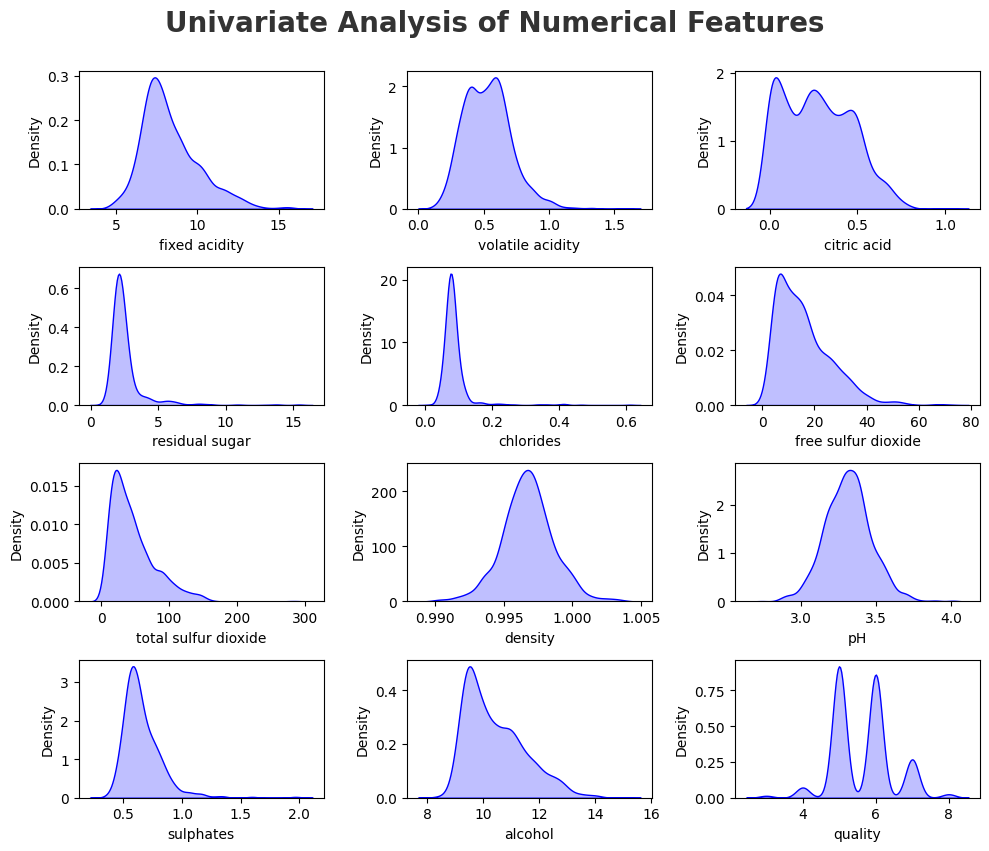

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[features[i]],shade=True, color='b')
    plt.xlabel(features[i])
    plt.tight_layout()

In [50]:
import numpy as np
data['free sulfur dioxide_sqrt'] = np.sqrt(data['free sulfur dioxide'])
data['total sulfur dioxide_sqrt'] = np.sqrt(data['total sulfur dioxide'])
data['sulphates_sqrt'] = np.sqrt(data['sulphates'])
data['alcohol_sqrt'] = np.sqrt(data['alcohol'])

In [51]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual_sugar_sqrt,free sulfur dioxide_sqrt,total sulfur dioxide_sqrt,sulphates_sqrt,alcohol_sqrt
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.378405,3.316625,5.830952,0.748331,3.065942
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1.612452,5.000000,8.185353,0.824621,3.130495
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1.516575,3.872983,7.348469,0.806226,3.130495
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.378405,4.123106,7.745967,0.761577,3.130495
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1.378405,3.316625,5.830952,0.748331,3.065942


<Axes: >

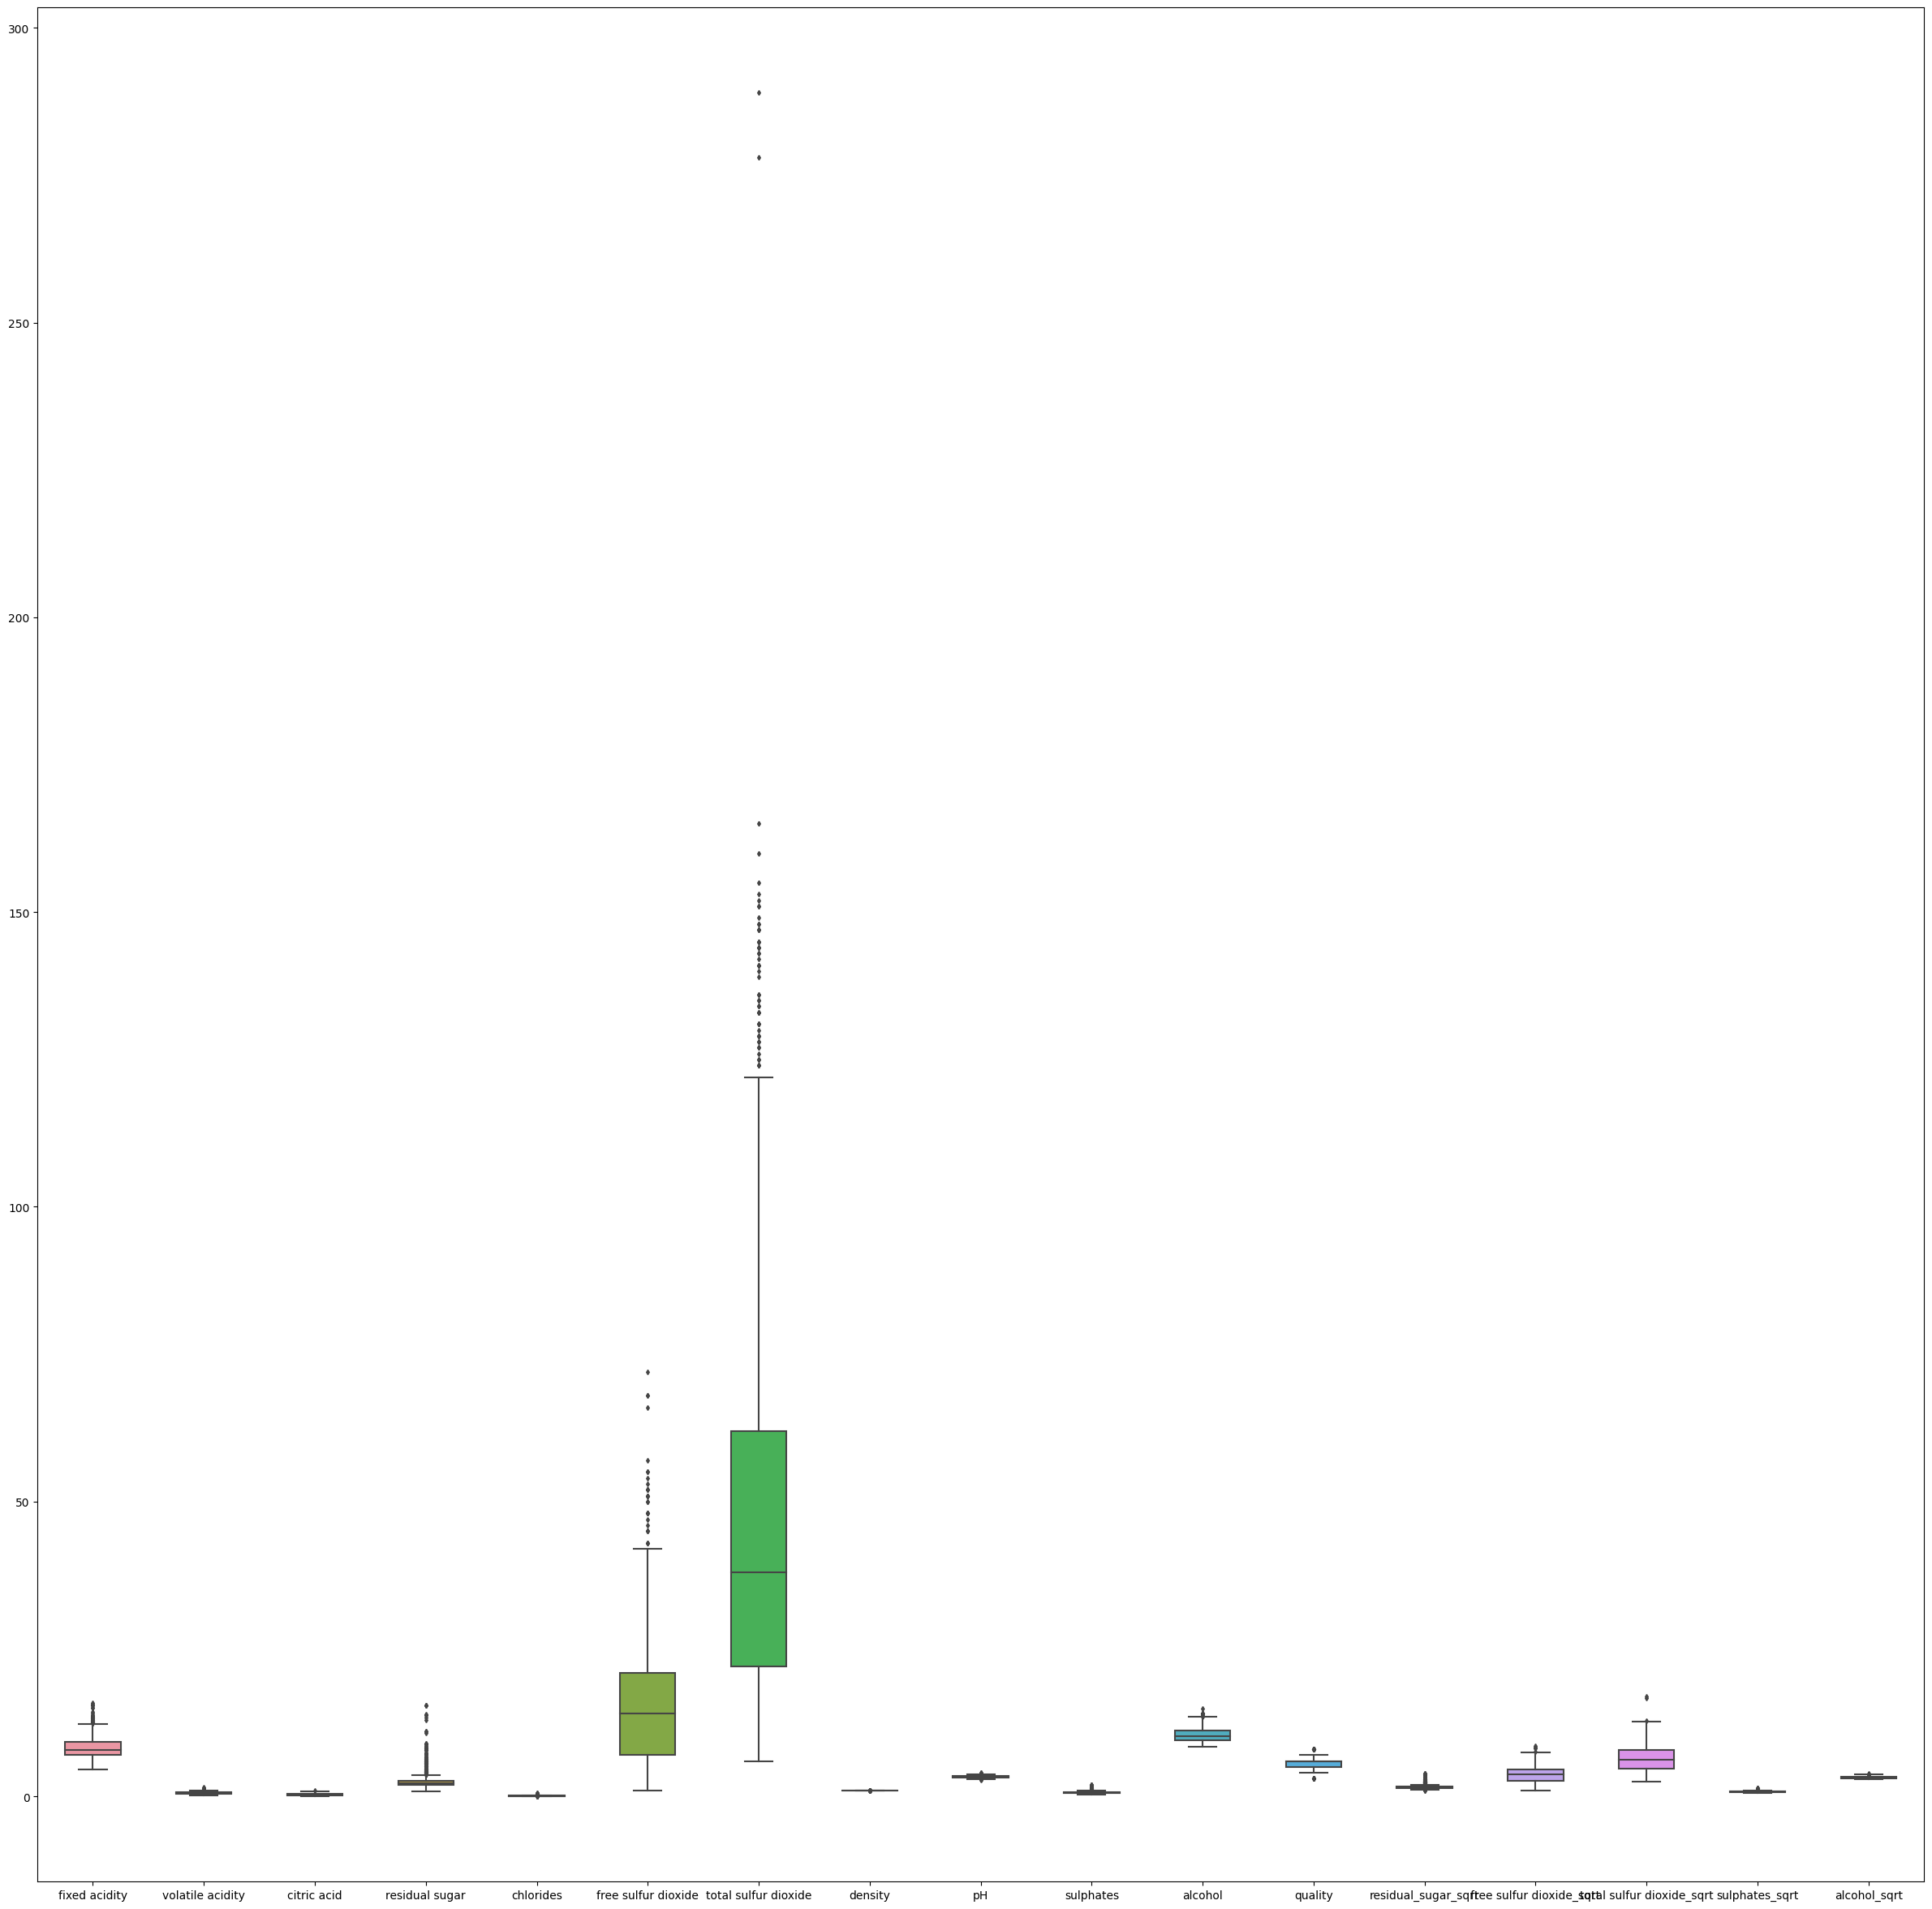

In [52]:
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [78]:
data[(list(data.columns)[1:])].corr()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual_sugar_sqrt,free sulfur dioxide_sqrt,total sulfur dioxide_sqrt,sulphates_sqrt,alcohol_sqrt
volatile acidity,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,0.014166,0.001242,0.077561,-0.283734,-0.201983
citric acid,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.160711,-0.076024,0.015832,0.324914,0.109559
residual sugar,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,0.981321,0.145921,0.177869,0.011048,0.040592
chlorides,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,0.049676,-0.000676,0.056220,0.343898,-0.223532
free sulfur dioxide,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,0.170502,0.982220,0.705625,0.050034,-0.070098
total sulfur dioxide,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,0.203863,0.684729,0.980374,0.026901,-0.209791
density,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,0.391027,-0.033398,0.089913,0.158297,-0.493737
pH,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.090253,0.085497,-0.040075,-0.175769,0.205958
sulphates,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.008045,0.055537,0.055978,0.993010,0.093668
alcohol,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,-0.496180,0.205633,0.093595,1.000000,0.476166,0.064991,-0.076352,-0.223158,0.116386,0.999588


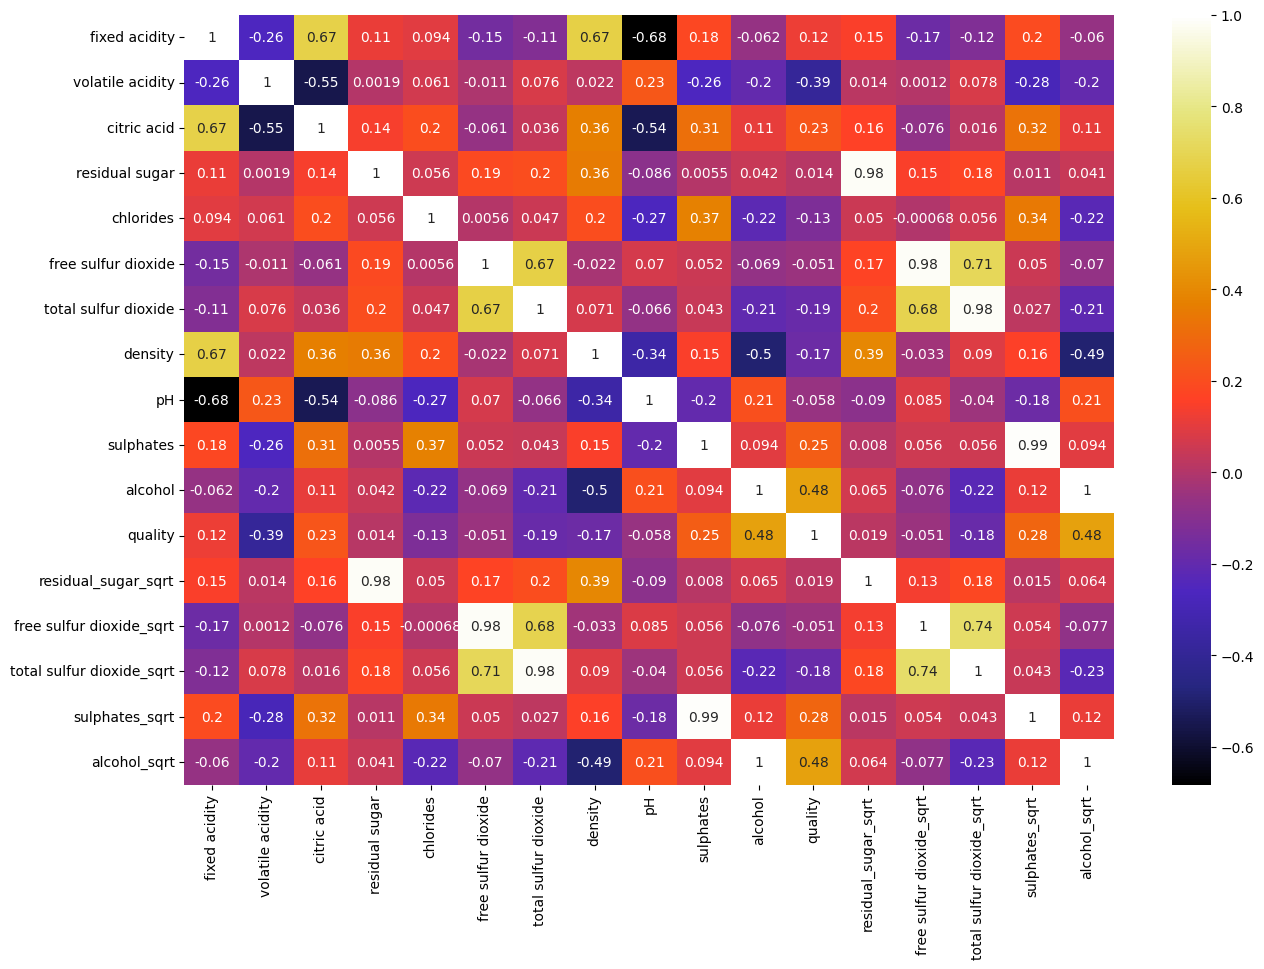

In [80]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap="CMRmap", annot=True)
plt.show()

In [103]:
X=data.drop(columns =["residual sugar","quality","free sulfur dioxide","total sulfur dioxide","sulphates","alcohol"],axis=1)

In [104]:
X.head()

,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,residual_sugar_sqrt,free sulfur dioxide_sqrt,total sulfur dioxide_sqrt,sulphates_sqrt,alcohol_sqrt
0,7.4,0.70,0.00,0.076,0.9978,3.51,1.378405,3.316625,5.830952,0.748331,3.065942
1,7.8,0.88,0.00,0.098,0.9968,3.20,1.612452,5.000000,8.185353,0.824621,3.130495
2,7.8,0.76,0.04,0.092,0.9970,3.26,1.516575,3.872983,7.348469,0.806226,3.130495
3,11.2,0.28,0.56,0.075,0.9980,3.16,1.378405,4.123106,7.745967,0.761577,3.130495
4,7.4,0.70,0.00,0.076,0.9978,3.51,1.378405,3.316625,5.830952,0.748331,3.065942


In [105]:
y=data["quality"]

In [106]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [108]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,residual_sugar_sqrt,free sulfur dioxide_sqrt,total sulfur dioxide_sqrt,sulphates_sqrt,alcohol_sqrt
1109,10.8,0.470,0.43,0.171,0.99820,3.17,1.449138,5.196152,8.124038,0.871780,3.286335
1032,8.1,0.820,0.00,0.095,0.99854,3.36,2.024846,2.236068,3.741657,0.728011,3.098387
1002,9.1,0.290,0.33,0.063,0.99516,3.26,1.431782,3.605551,5.196152,0.916515,3.420526
487,10.2,0.645,0.36,0.053,0.99820,3.17,1.341641,2.236068,3.741657,0.648074,3.162278
979,12.2,0.450,0.49,0.075,0.99690,3.13,1.183216,1.732051,2.449490,0.793725,3.224903


In [109]:
 from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler()

In [111]:
scaler.fit(X_train)##calculate the mean and std dev

StandardScaler()

In [112]:
X_train_tf=scaler.transform(X_train)

In [113]:
X_train_tf

array([[ 3.79780175, -1.73659008,  0.8570712 , ..., -0.68363042,
         1.11003776, -1.17207279],
       [-0.36423038, -1.46457323,  0.14233674, ..., -0.13085131,
        -1.2309583 ,  0.38651739],
       [ 2.60050484, -0.97494291,  1.1123335 , ..., -0.23933102,
         0.05472501,  1.48083412],
       ...,
       [-0.2502021 ,  0.2219312 ,  0.1933892 , ...,  1.05897631,
         0.23980076, -0.87008241],
       [ 2.65751898, -0.32210249,  1.1123335 , ...,  0.17110297,
         0.17856418,  2.09399135],
       [ 0.83306653,  2.45246933,  0.24444166, ...,  2.56194653,
        -1.15742018, -0.97020898]])

In [114]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [115]:
from sklearn.svm import SVC
model=SVC()

In [116]:
model.fit(X_train_tf,y_train)

SVC()

In [117]:
model.score(X_train_tf,y_train)

0.673202614379085

In [118]:
X_test_tf=scaler.transform(X_test)

In [119]:
y_predict=model.predict(X_test_tf)

In [120]:
y_test

1109    6
1032    5
1002    7
487     6
979     5
       ..
1283    6
195     5
977     5
708     6
1461    4
Name: quality, Length: 528, dtype: int64

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
accuracy_score(y_test,y_predict)

0.6363636363636364